Objetivos:

- Data Analisis:
  - Analizar el contenido del dataset
  - Limpiar datos
- Guardar el dataset "limpiado" en un nuevo archivo: **1-fitness-tracker-dataset.csv**

In [7]:
# pip install kagglehub pandas matplotlib seaborn
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

1. Obtener el dataset desde [Kaggle](https://www.kaggle.com/datasets/nadeemajeedch/fitness-tracker-dataset)

In [2]:
# Download latest version
path = kagglehub.dataset_download("nadeemajeedch/fitness-tracker-dataset")

# C:\Users\USER\.cache\kagglehub\datasets\nadeemajeedch\fitness-tracker-dataset\versions\1
# gym_members_exercise_tracking_synthetic_data.csv
print("Path to dataset files:", path)

Path to dataset files: C:\Users\USER\.cache\kagglehub\datasets\nadeemajeedch\fitness-tracker-dataset\versions\1


2. Leer el dataset descargado de **Kaggle**
   1. Inspeccionar la data con **Data Wrangler** (VS Code), ver que columnas tienen muchos valores faltantes:
      1. Hay algunos datos faltantes, pero parece ser que la mayoria de las columnas tienen la mayor parte de sus valores completos. Son pocos los registros faltantes.

In [3]:
fitness_tracking_df = pd.read_csv(f"{path}/gym_members_exercise_tracking_synthetic_data.csv")

fitness_tracking_df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,34.0,Female,86.7,1.86,174,152.0,74.0,1.12,712.0,Strength,12.8,2.4,5.0,2.0,14.31
1,26.0,Female,84.7,1.83,166,156.0,73.0,1.00,833.0,Strength,27.9,2.8,5.0,2.0,33.49
2,22.0,Male,64.8,1.85,187,166.0,64.0,1.24,1678.0,Cardio,28.7,1.9,3.0,2.0,12.73
3,54.0,Female,75.3,1.82,187,169.0,58.0,1.45,628.0,Cardio,31.8,2.4,4.0,1.0,20.37
4,34.0,Female,52.8,1.74,177,169.0,66.0,1.60,1286.0,Strength,26.4,3.2,4.0,2.0,20.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,54.0,Male,88.5,2.00,173,134.0,58.0,1.11,1388.0,HIIT,27.7,3.7,3.0,2.0,36.73
1796,52.0,Male,84.3,1.69,164,169.0,54.0,0.77,1367.0,HIIT,32.6,2.9,3.0,2.0,15.11
1797,47.0,Male,70.1,1.84,188,129.0,67.0,1.20,1261.0,Strength,28.4,2.5,3.0,2.0,17.99
1798,35.0,Male,49.3,1.71,180,152.0,73.0,1.04,956.0,Cardio,32.9,1.7,4.0,3.0,12.65


3. Inspeccionar la data faltante a profundidad con **seaborn** y **matplotlib**
   1. En general hay pocos datos faltantes

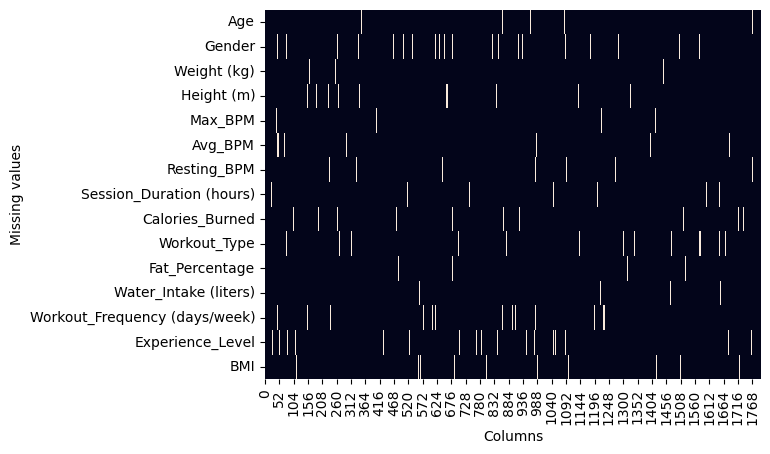

In [8]:
ax = plt.axes() # Añadir eje a la figura actual
sns.heatmap(fitness_tracking_df.isna().transpose(), cbar=False, ax=ax) # Setear un "heatmap" con "seaborn" de las columnas del dataset que no tiene valor establecido

# Agregar etiquetas a la tabla para la info faltante
plt.xlabel("Columns")
plt.ylabel("Missing values")

# Mostrar el heatmap
plt.show()

## Conclusiones

- Dado que hay algunos datos faltantes, pero no parecen tener una distribucion uniforme, se vera cuantos registros son los que les falta un valor y en base a eso valorar si se borran o no todos los registro con informacion faltante

4. Identificar lo registros con datos faltantes

In [ ]:
# Obtener un array de todas las columnas
list(fitness_tracking_df.columns)

['Age',
 'Gender',
 'Weight (kg)',
 'Height (m)',
 'Max_BPM',
 'Avg_BPM',
 'Resting_BPM',
 'Session_Duration (hours)',
 'Calories_Burned',
 'Workout_Type',
 'Fat_Percentage',
 'Water_Intake (liters)',
 'Workout_Frequency (days/week)',
 'Experience_Level',
 'BMI']

In [ ]:
# Obtener rewgistros con valores faltantes por columna
fitness_tracking_df.isnull().sum()

Age                              10
Gender                           71
Weight (kg)                      22
Height (m)                       26
Max_BPM                          21
Avg_BPM                          30
Resting_BPM                      19
Session_Duration (hours)         23
Calories_Burned                  23
Workout_Type                     61
Fat_Percentage                   16
Water_Intake (liters)            24
Workout_Frequency (days/week)    58
Experience_Level                 57
BMI                              30
dtype: int64

In [17]:
# Muestra todas las filas que tienen al menos un valor faltante
missing_rows_df = fitness_tracking_df[fitness_tracking_df.isnull().any(axis=1)]

missing_rows_df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
11,46.0,Male,40.0,1.88,168,131.0,69.0,2.00,672.0,NaN,25.4,2.4,2.0,2.0,12.32
19,NaN,Male,63.0,1.51,184,169.0,71.0,1.30,1136.0,Cardio,23.8,2.3,3.0,2.0,22.69
22,36.0,Female,64.2,1.78,192,130.0,74.0,1.38,1708.0,Yoga,31.9,2.1,NaN,1.0,25.59
23,18.0,Male,129.4,1.50,177,145.0,71.0,NaN,772.0,Strength,22.0,1.7,5.0,1.0,18.07
27,18.0,Male,40.0,1.72,188,155.0,74.0,1.51,1266.0,Cardio,26.4,2.5,2.0,NaN,17.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1769,NaN,Female,82.7,1.79,191,124.0,NaN,1.15,823.0,HIIT,31.8,1.8,3.0,1.0,12.32
1771,18.0,Female,65.5,1.69,178,134.0,53.0,1.29,405.0,Cardio,24.4,NaN,4.0,2.0,12.32
1774,28.0,Female,93.2,1.71,176,149.0,60.0,1.40,1348.0,HIIT,27.2,2.1,NaN,2.0,14.12
1783,36.0,Male,80.8,1.91,184,NaN,59.0,0.99,780.0,HIIT,23.6,3.3,4.0,2.0,18.61


In [18]:
# Mostrar el numeto total de registros vs el numero total de registros con algun valor faltante
print(len(fitness_tracking_df)) # 1800
print(len(missing_rows_df)) # 441



1800
441


## Conclusiones

1800 / 441 = 4.0816326530612244897959183673469
100 / 4.0816326530612244897959183673469 = 24.5
1800 - 441 = 1359

- El 24.5% de todos los registros tienen al menos algun valor faltante
- Con el objetivo de trabajar con puros registros completos, se borrara los registros con datos faltantes del dataframe

5. Limpiar dataframe fitness_tracking_df y exportarlo como un nuevo dataset en formato csv

In [ ]:
# Eliminar filas con valores faltantes usando los índices de missing_rows_df
fitness_tracking_df_clean = fitness_tracking_df.drop(missing_rows_df.index)

# Resultado Final
fitness_tracking_df_clean # 1359 rows

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,34.0,Female,86.7,1.86,174,152.0,74.0,1.12,712.0,Strength,12.8,2.4,5.0,2.0,14.31
1,26.0,Female,84.7,1.83,166,156.0,73.0,1.00,833.0,Strength,27.9,2.8,5.0,2.0,33.49
2,22.0,Male,64.8,1.85,187,166.0,64.0,1.24,1678.0,Cardio,28.7,1.9,3.0,2.0,12.73
3,54.0,Female,75.3,1.82,187,169.0,58.0,1.45,628.0,Cardio,31.8,2.4,4.0,1.0,20.37
4,34.0,Female,52.8,1.74,177,169.0,66.0,1.60,1286.0,Strength,26.4,3.2,4.0,2.0,20.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,54.0,Male,88.5,2.00,173,134.0,58.0,1.11,1388.0,HIIT,27.7,3.7,3.0,2.0,36.73
1796,52.0,Male,84.3,1.69,164,169.0,54.0,0.77,1367.0,HIIT,32.6,2.9,3.0,2.0,15.11
1797,47.0,Male,70.1,1.84,188,129.0,67.0,1.20,1261.0,Strength,28.4,2.5,3.0,2.0,17.99
1798,35.0,Male,49.3,1.71,180,152.0,73.0,1.04,956.0,Cardio,32.9,1.7,4.0,3.0,12.65


In [21]:
# Guardar el dataset final: "1-fitness-tracker-dataset.csv"
fitness_tracking_df_clean.to_csv("../datasets/1-fitness-tracker-dataset.csv", index=False)